# Seminar: Exploratory Data Analysis in Python/Pandas environment

* We will use the Ames Housing dataset of real estate sales
* The content is based on the Kaggle Competition House Prices Advanced Regression Techniques. See details [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

### Goals for today:
* Read files (csv)
* Display needed parts of df
* Aggregate df
* Filter df

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Task 1: Read data and undestand it's structure

### 1a. Load training dataset (in `./data/train.csv`) and display 5 random rows

Hint: Use `.style` attribute to display all columns

Hint: See  `./data/data_description.txt` for documentation of variables

In [3]:
df= pd.read_csv("./train.csv", index_col= "Id")
df.sample(5).style


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
384,45,RH,60.000000,9000,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1.5Unf,6,3,1928,1950,Gable,CompShg,Wd Sdng,Wd Sdng,nan,0.000000,TA,TA,BrkTil,Fa,Fa,No,Unf,0,Unf,0,784,784,GasA,TA,N,FuseA,784,0,0,784,0,0,1,0,2,1,TA,5,Typ,0,nan,Detchd,1950.000000,Unf,2,360,Fa,Fa,N,0,0,91,0,0,0,nan,nan,nan,0,10,2009,WD,Normal,76000
803,60,RL,63.000000,8199,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,WdShing,Wd Shng,nan,0.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,648,Unf,0,80,728,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2005.000000,Fin,2,410,TA,TA,Y,36,18,0,0,0,0,nan,nan,nan,0,10,2008,WD,Normal,189000
737,90,RL,60.000000,8544,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,Stucco,Stone,nan,0.000000,TA,TA,CBlock,nan,nan,nan,nan,0,nan,0,0,0,GasA,Gd,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,nan,Detchd,1949.000000,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,7,2006,WD,Normal,93500
475,120,RL,41.000000,5330,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2000,2000,Gable,CompShg,CemntBd,CmentBd,nan,0.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,1196,Unf,0,298,1494,GasA,Ex,Y,SBrkr,1652,0,0,1652,1,0,2,0,2,1,Ex,6,Typ,0,nan,Attchd,2000.000000,RFn,2,499,TA,TA,Y,96,48,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,251000
1003,20,RL,75.000000,11957,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,53.000000,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1550,1574,GasA,Ex,Y,SBrkr,1574,0,0,1574,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.000000,RFn,3,824,TA,TA,Y,144,104,0,0,0,0,nan,nan,nan,0,7,2008,WD,Normal,232000


In [33]:
 df.LotArea.sum() 

15354569

In [32]:
df1=df[df['YearBuilt']== df["YearBuilt"].min()]
df1["Street"]

Id
1350    Pave
Name: Street, dtype: object

In [22]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### 1b. What is the distribution `SalePrice` variable?

* plot histogram (`.hist()` on `pd.Series`) with bin width $10,000

Hint: Specify bins using range

<Axes: >

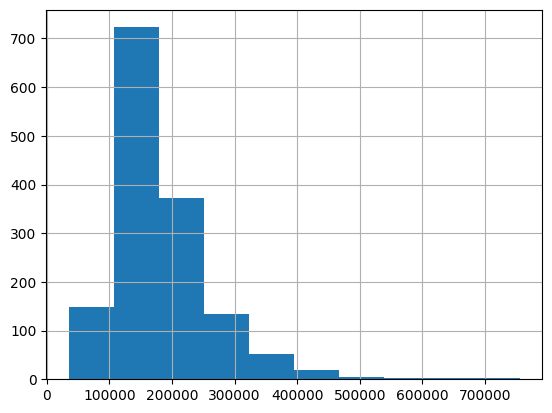

In [27]:
df.SalePrice.hist(bins=10)


In [ ]:
df.SalePrice.hist(bins=range(0,df.sale))

### 1c. Split columns between quantitative and qualitative variables
Store column names in separate lists of strings `quantitative` and `qualitative`

Hint: `.dtypes` attribute contains a series with strings describing dtype of the data

In [29]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [42]:
quantitative = [i for i in df.columns if df.dtypes[i]!="object"]
qualitative = [i for i in df.columns if df.dtypes[i]=="object"]

print(qualitative)
print(quantitative)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

### 1c* displace df with only quantitative columns

In [43]:
df[quantitative]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


### 1d. Are `dtype`s correct? 

* visually check whether all the columns look correctly parsed

In [44]:
df[quantitative]


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [41]:
df[qualitative]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


### 1e. Plot number of missing data for all columns

In [52]:
df.isna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


<Axes: >

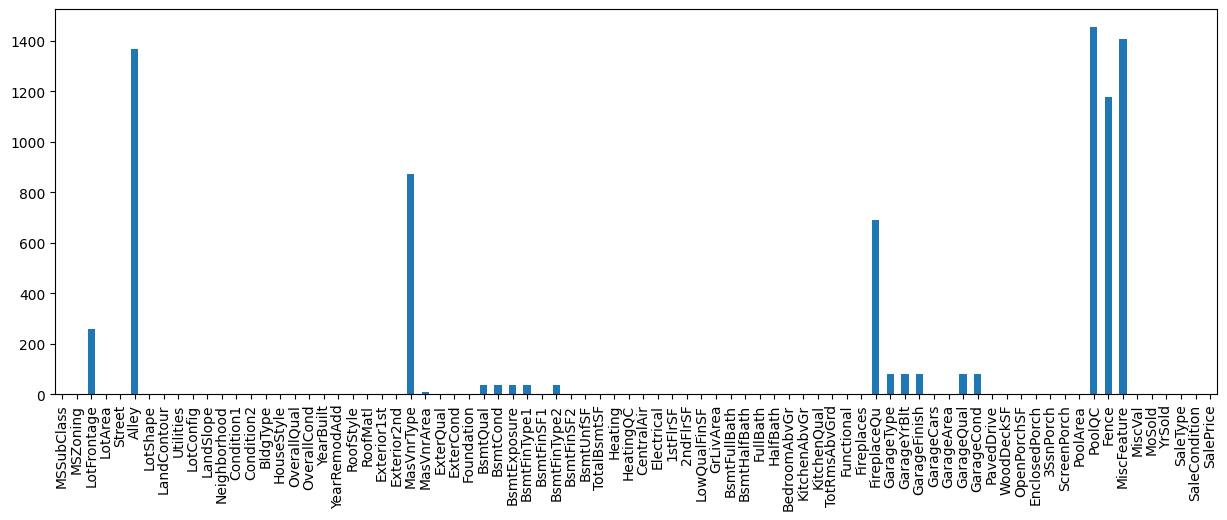

In [66]:
df.isna().sum().plot.bar(figsize=(15,5))

<Axes: >

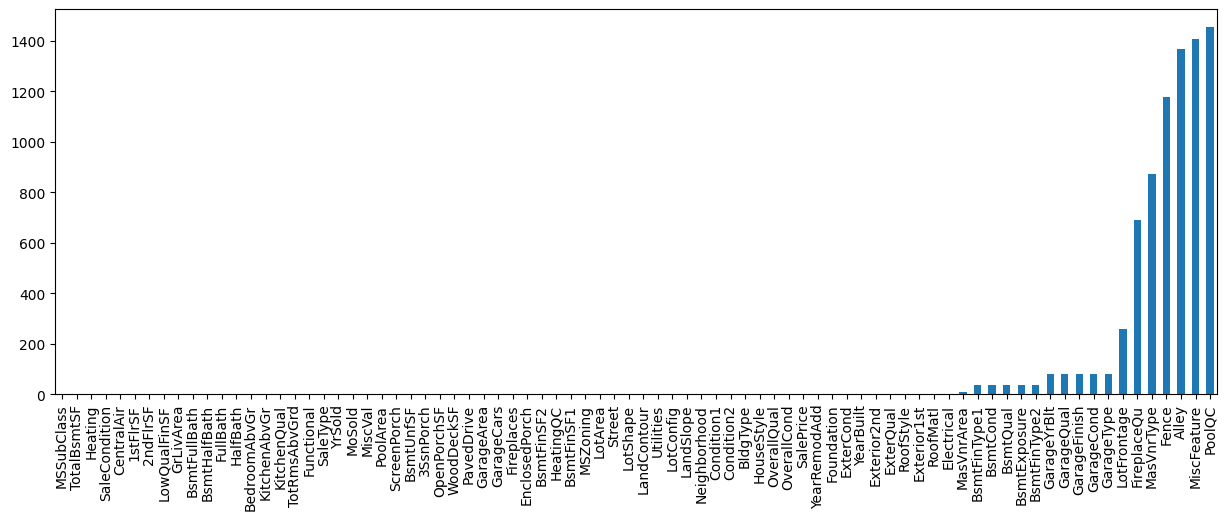

In [72]:

df.isna().sum().sort_values().plot.bar(figsize= (15,5))

### For the better visiability drop columns with no missing data

In [82]:
col_names_with_miss_val= [i for i in df.columns if df[i].isna().sum()!=0]
col_names_with_miss_val

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<Axes: >

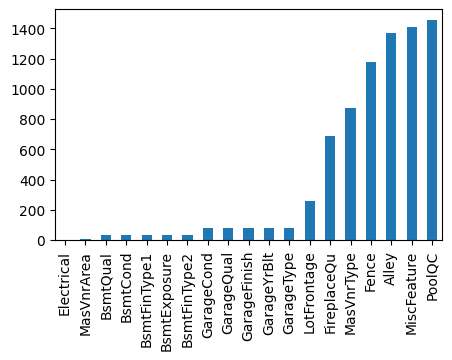

In [83]:
df[col_names_with_miss_val].isna().sum().sort_values().plot.bar(figsize=(5,3))


## Task 2: Aggregation

### 2.1 Calculate the average LotArea for each year (YrSold)

In [85]:
df.head(5).style

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,nan,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,nan,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [107]:
df.groupby("YrSold")[["LotArea"]].agg(["mean","min","max"])

LotArea              
                mean   min     max
YrSold                            
2006    10489.458599  1533   70761
2007    10863.686930  1890  159000
2008    10587.687500  1680  164660
2009    10294.248521  1300  215245
2010    10220.645714  1491   57200

### 2.2 Calculate the average SalePrice for each street (Street)

In [110]:
df.groupby("Street")[["SalePrice"]].mean().reset_index()

,Street,SalePrice
0,Grvl,130190.500000
1,Pave,181130.538514


### 2.2 Calculate the average SalePrice for Grvl street (Street)

In [123]:
streets = df.groupby("Street")[["SalePrice"]].mean().reset_index()

In [126]:
streets[streets["Street"]=="Grvl"]


,Street,SalePrice
0,Grvl,130190.5


In [161]:
df_filtred = df[df["SalePrice"]>300000]
df_filtred

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500
1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000


### 2.3 Calculate the average SalePrice for Grvl street (Street) But! Take into account only flats which cost more than 300000

In [166]:
df_filtred.groupby("Street")[["SalePrice"]].mean().reset_index()



,Street,SalePrice
0,Pave,375946.26087


## Task 3 Filtering

### 3.1 How many flats cost less than 200000 and have a 'Normal' condition (column SaleCondition)

In [ ]:
len(df[(df['SalePrice']<200000)&(df['SaleCondition']=='Normal')])

In [175]:
len(df[(df["SaleCondition"]=="Normal") & (df["SalePrice"]<2000000)])


1198

### 3.2 How many flats cost less than 200000 or have a 'Normal' condition (column SaleCondition)

In [178]:
len(df[(df["SaleCondition"]=="Normal") | (df["SalePrice"]<2000000)])


1460

### 3.3 How many flats cost have more areas on the second floor(2ndFlrSF) then on the first one(1stFlrSF)?

In [182]:
len(df[(df["1stFlrSF"])<(df["2ndFlrSF"])])


135

### What is the average cost (in thousands) for such type of the flats?

In [185]:
df1 = (df[(df["1stFlrSF"])<(df["2ndFlrSF"])])


In [191]:
df1["SalePrice"].mean()/1000

200.49360000000001

# BONUSES

## Task 1: Study relationships between variables

### 1a. see correlation matrix

NameError: name 'df' is not defined

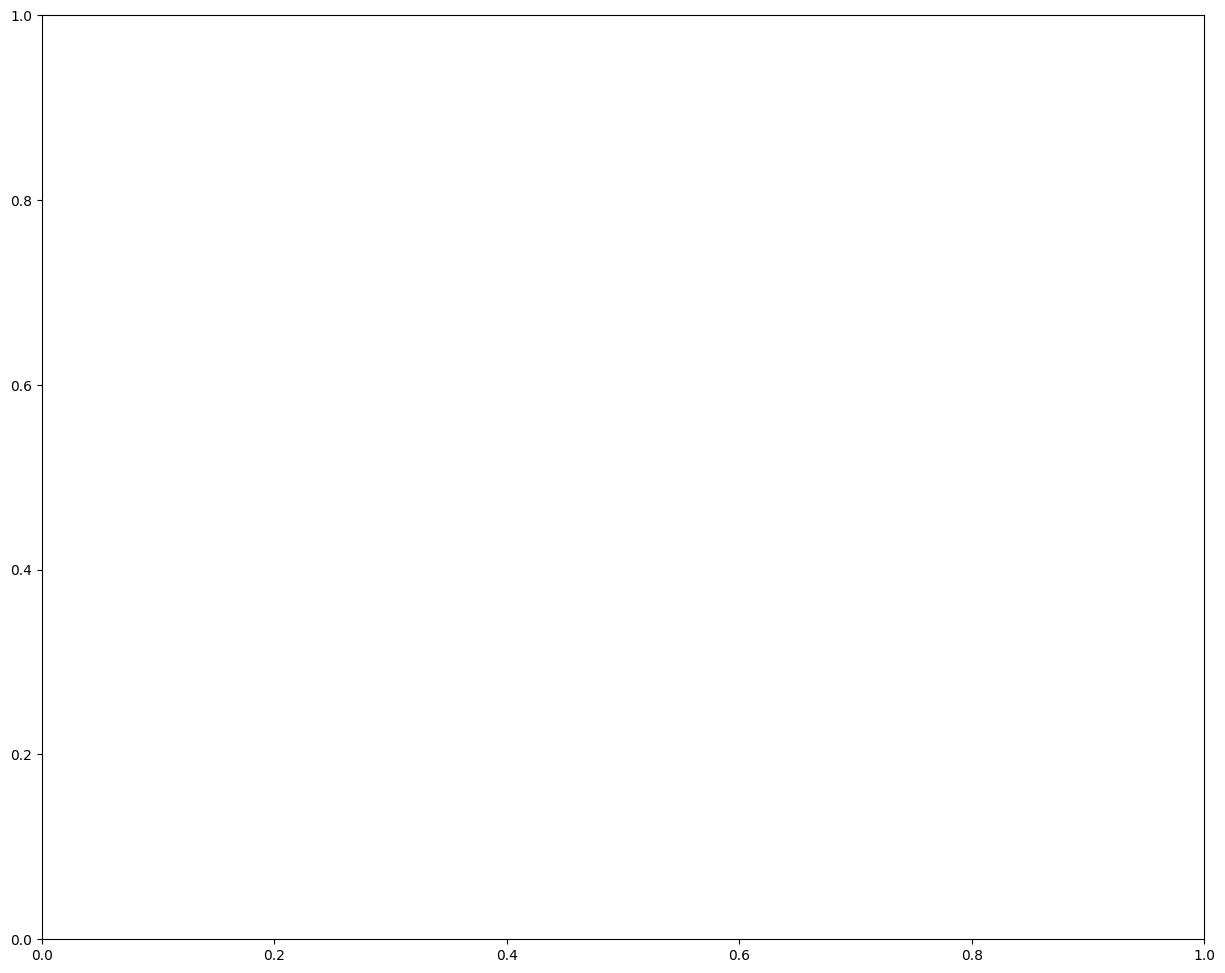

In [3]:
fig=plt.subplots(1,1,figsize=(15,12))
sns.heatmap(df[quantitative].corr(),vmin=-1,cmap='coolwarm',annot=True,fmt='0.1f')

### 2b. Boxplots for categorical variables

In [ ]:
sns.boxplot(data=df,x='MSZoning',y='SalePrice')

## Task 2: ANOVA disparity estimations 

### One-way ANOVA 
* Question: Do sale prices differ across categories of certain feature?
* Test: Do price means across factors with a feature differ in their underlying distribution? 
* Are prices of houses with pool drawn from distribution with different mean than prices of house without a pool? 

* We will test this on all features and plot results

### 2a. Function for estimating ANOVA for one feature
* Your task is to complete a following snippet:


```python

 def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether all levels of `qualitative` series are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    
    Uses `scipy.stats.f_oneway` to deliver the test.

    Returns pd.Series with `statistic`, `p_value` and `disparity` measure. `statistic` and `p_value` are calculated by `scipy.stats.f_oneway`. Disparity is calculated as 1/log(p_value).
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor] for factor in qualitative_series.fillna('MISSING').unique()
    }

    anova_result =  stats.f_oneway(*samples.values())
    
    pass
```

In [ ]:
def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether `quantitative_series` across levels of `qualitative_series` are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    

    Returns Series with test statistic, p-value
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor]for factor in qualitative_series.fillna('MISSING').unique()
    }

    statistic, pvalue =  stats.f_oneway(*samples.values())
    
    return pd.Series({
        'statistic':statistic,
        'p_value':pvalue,
        'disparity': math.log(1./pvalue)
    })

anova_feature(df.MasVnrType, df.SalePrice)

### 2b. Generate dataframe with ANOVA test of all quantitative columns on `SalePrice` in the dataset

In [ ]:
anova = pd.DataFrame({
    col: anova_feature(df[col],df.SalePrice) for col in qualitative
}).T
anova

### 2c. Plot the disparity measure

In [ ]:
anova.disparity.sort_values(ascending=False).plot.bar(figsize=(12,3))

## Task 3: Encode qualitative variables as quantitative
### 3a. Feature-level function

* Write a function that  an input dataframe with encoded version
* Complete the following snippet

In [ ]:
def encode_qualitative_feature(quantitative_series, qualitative_series, sorting_function=np.mean,suffix='_E'):
    '''
    Ranks `qualitative_series` according to sorting function applied on `quantitative_series` and return its rank as a series. 
    
    Series name is extended with `suffix`.
    '''
    encode_df = pd.DataFrame({
        quantitative_series.name:quantitative_series,
        qualitative_series.name:qualitative_series 
    })

    sorting = encode_df.groupby(qualitative_series.name)[quantitative_series.name].apply(np.mean).rank()

    return qualitative_series.map(sorting).rename(f'{qualitative_series.name}{suffix}')

In [ ]:
encode_qualitative_feature(df.SalePrice, df.KitchenQual)

## 3b. Apply on all qualitative features


In [ ]:
def encode_columns(df, columns, sorting_function=np.mean,suffix='_E'):
    for col in columns:
        ranked_col = encode_qualitative_feature(df.SalePrice, df[col])
        df[ranked_col.name] = ranked_col

    return df

df_encoded =encode_columns(df.copy(), qualitative, sorting_function=np.mean,suffix='_E')
df_encoded